# Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
plt.rcParams["figure.figsize"] = [12,6]

# Importing Data

In [27]:
data = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\uber-raw-data-apr14.csv")

# Performing Intermediary Analysis

In [28]:
data.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


In [29]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [30]:
data.index

RangeIndex(start=0, stop=564516, step=1)

In [31]:
data.shape

(564516, 4)

In [32]:
data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [33]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [34]:
data.nunique()

Date/Time    41999
Lat           4149
Lon           5621
Base             5
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [36]:
data.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


# Performing data visualisations

In [37]:
d = data["Date/Time"].str.split(" ", n = 1, expand = True)
data["Date"] = d[0]
data["Time"] = d[1]

In [38]:
newdata = data.to_csv(r"C:\Users\jaskeerat singh\Desktop\newdata.csv")

In [39]:
newdata = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\newdata.csv")
newdata["Day"] = pd.DatetimeIndex(newdata["Date"]).day
newdata.drop("Unnamed: 0", axis = 1, inplace = True)

In [40]:
new = newdata.groupby("Date")["Time"].count().to_frame()

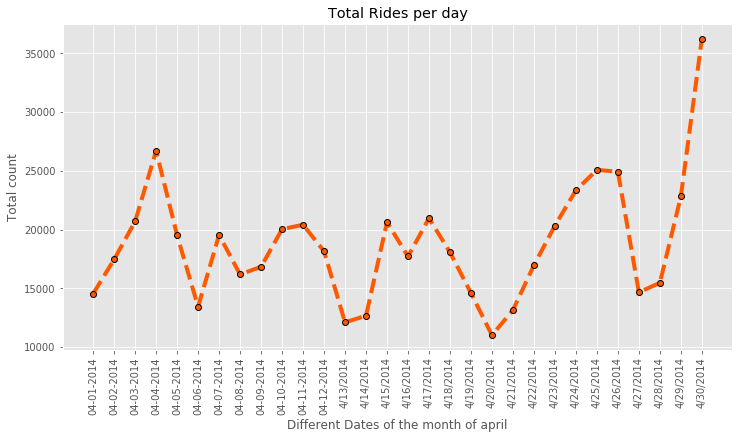

In [85]:
plt.plot(new, color = "#ff5900", ls = "--", lw = 4, marker = "o", markeredgecolor = "#000000")
plt.xlabel("Different Dates of the month of april")
plt.ylabel("Total count")
plt.title("Total Rides per day")
plt.xticks(rotation = "vertical")
plt.show()

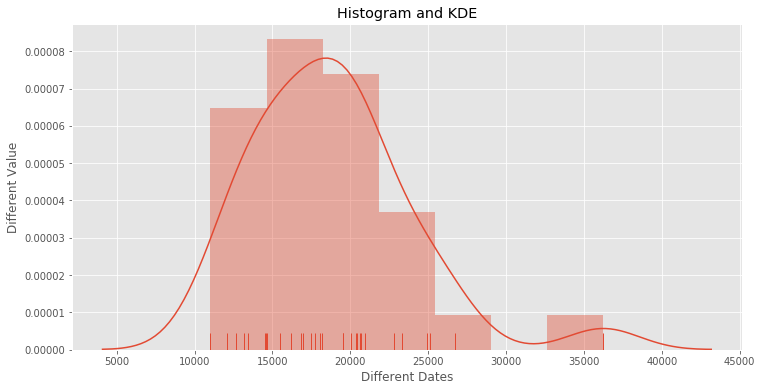

In [42]:
sns.distplot(new, rug = True)
plt.xlabel("Different Dates")
plt.ylabel("Different Value")
plt.title("Histogram and KDE")
plt.show()

In [43]:
newdata["Base"].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

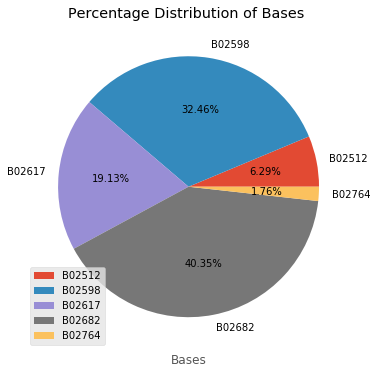

In [44]:
base = data.groupby("Base")["Lat"].count().to_frame()
plt.pie(base["Lat"], labels = base.index, autopct='%1.2f%%')
plt.xlabel("Bases")
plt.title("Percentage Distribution of Bases ")
plt.legend(loc = "lower left")
plt.show()

In [45]:
newdata["Hour"] = pd.DatetimeIndex(newdata["Time"]).hour
newdata = newdata.to_csv(r"C:\Users\jaskeerat singh\Desktop\customdata.csv")

In [5]:
custom = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\customdata.csv")
custom.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
head = custom.groupby("Hour")["Base"].count().to_frame()
head

,Base
Hour,
0,11910
1,7769
2,4935
3,5040
4,6095
5,9476
6,18498
7,24924
8,22843


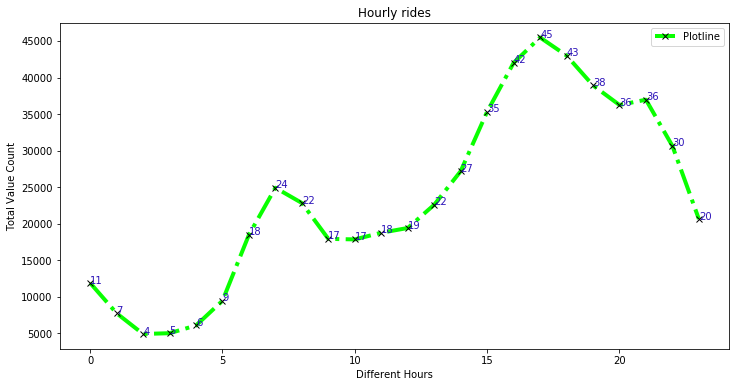

In [7]:
plt.plot(head, color = "#09ff00", ls = "-.", lw = 4, marker = "x", markeredgecolor = "#000000", label = "Plotline")
plt.xlabel("Different Hours")
plt.ylabel("Total Value Count")
plt.title("Hourly rides")
for index, value in enumerate(head["Base"]):
    plt.text(index, value,str(value//1000),color='#2b12b8')
plt.legend()
plt.show()

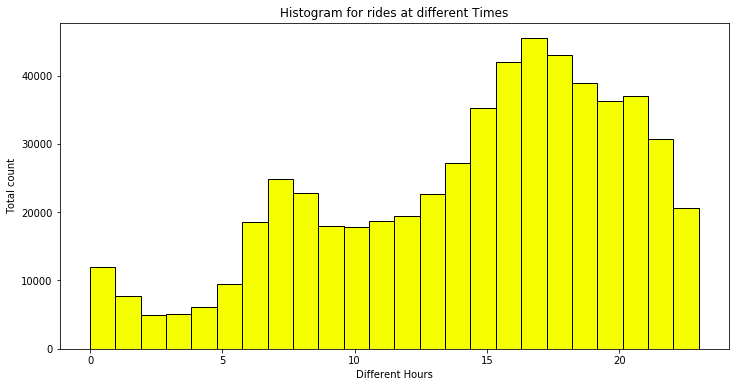

In [8]:
plt.hist(custom["Hour"], bins = 24, color = "#f6ff00", edgecolor = "#000000")
plt.xlabel("Different Hours")
plt.ylabel("Total count")
plt.title("Histogram for rides at different Times")
plt.show()

In [9]:
custom.corr()

,Lat,Lon,Day,Hour
Lat,1.000000,0.041692,0.003550,0.003994
Lon,0.041692,1.000000,0.004992,-0.019513
Day,0.003550,0.004992,1.000000,0.000566
Hour,0.003994,-0.019513,0.000566,1.000000


In [10]:
custom["Date"] = pd.to_datetime(custom["Date"], format = "%m/%d/%Y")
custom["Day_name"] = custom['Date'].dt.day_name()

In [11]:
week = custom.groupby("Day_name")["Base"].count().to_frame()
week

,Base
Day_name,
Friday,90303
Monday,60861
Saturday,77218
Sunday,51251
Thursday,85067
Tuesday,91185
Wednesday,108631


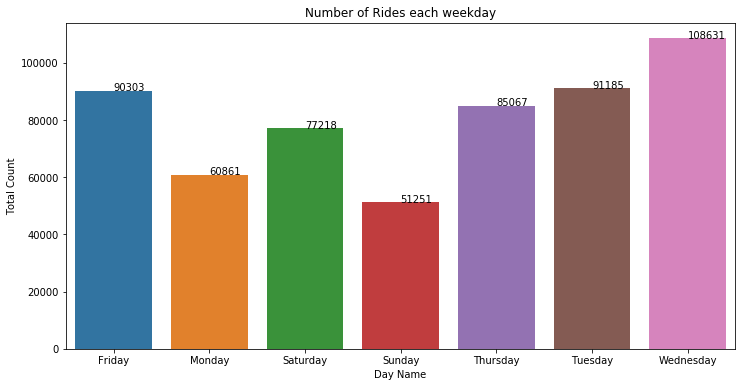

In [12]:
sns.barplot(week.index,week["Base"])
plt.xlabel("Day Name")
plt.ylabel("Total Count")
plt.title("Number of Rides each weekday")
for index, value in enumerate(week["Base"]):
    plt.text(index, value,str(value))
plt.show()

In [13]:
custom = custom.dropna()

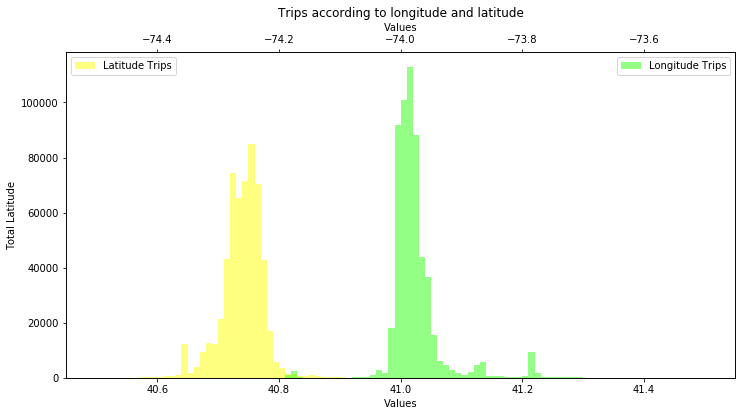

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.hist(custom["Lat"], bins = 100, range = (40.5,41.5), color = "#ffff00", label = "Latitude Trips", alpha = 0.5)
ax2.hist(custom["Lon"], bins = 100, range = (-74.5,-73.5), color = "#29ff0d", label = "Longitude Trips", alpha = 0.5)

plt.title("Trips according to longitude and latitude")

ax1.set_ylabel("Total Latitude")
ax2.set_ylabel("Total Longitude")
ax1.set_xlabel("Values")
ax2.set_xlabel("Values")

ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()

In [15]:
custom

,Date/Time,Lat,Lon,Base,Date,Time,Day,Hour,Day_name
0,04-01-2014 00:11,40.7690,-73.9549,B02512,2014-04-01,0:11,1,0,Tuesday
1,04-01-2014 00:17,40.7267,-74.0345,B02512,2014-04-01,0:17,1,0,Tuesday
2,04-01-2014 00:21,40.7316,-73.9873,B02512,2014-04-01,0:21,1,0,Tuesday
3,04-01-2014 00:28,40.7588,-73.9776,B02512,2014-04-01,0:28,1,0,Tuesday
4,04-01-2014 00:33,40.7594,-73.9722,B02512,2014-04-01,0:33,1,0,Tuesday
...,...,...,...,...,...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764,2014-04-30,23:22:00,30,23,Wednesday
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764,2014-04-30,23:26:00,30,23,Wednesday
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764,2014-04-30,23:31:00,30,23,Wednesday
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764,2014-04-30,23:32:00,30,23,Wednesday


In [16]:
final = custom.to_csv(r"C:\Users\jaskeerat singh\Desktop\finaldata.csv")